In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_path_autism = "../dataset_public/autism_train.csv"
test_data_path_autism = "../dataset_public/autism_test.csv"
train_data_path_id = "../dataset_public/intellectual_train.csv"
test_data_path_id = "../dataset_public/intellectual_test.csv"

In [3]:
def read_data(file_path):
    return pd.read_csv(file_path)

def clip_values(df):
    df_clipped = df.copy()
    # We only clip the columns that have numerical values, excluding 'case_id', 'client_id', and 'target'
    cols_to_clip = df_clipped.select_dtypes(include=np.number).columns.difference(['case_id', 'client_id', 'target'])
    df_clipped[cols_to_clip] = df_clipped[cols_to_clip].clip(lower=0, upper=100)
    return df_clipped

In [4]:
train_autism = read_data(train_data_path_autism)
test_autism = read_data(test_data_path_autism)
train_id = read_data(train_data_path_id)
test_id = read_data(test_data_path_id)

train_autism = clip_values(train_autism)
test_autism = clip_values(test_autism)
train_id = clip_values(train_id)
test_id = clip_values(test_id)

In [5]:
train_autism.head()

,case_id,client_id,Verbalization,Voicing,Articulation,Phonology,Syntax,Perception,Fine Motor,Pre-writing,...,Sequencing,Memory,Perception.1,Recognition,Cognitive Flexibility,Empathy (ASD),Verbal and Intellectual Ability (ASD),Attention deficit (Intellectual-ASD-ADHD),Sustained Attention (ASD),target
0,282,client1,72,55,27.666667,100.0,0,100.0,91,57,...,78.25,38.5,100.0,100,77.5,44.2,37.8,100,0,0
1,119,client1,72,77,28.666667,100.0,75,100.0,91,20,...,72.00,56.0,90.0,100,88.5,28.8,30.4,0,0,-1
2,377,client1,26,33,13.000000,100.0,33,100.0,91,22,...,72.00,12.5,100.0,100,66.5,21.2,42.0,100,0,-1
3,170,client1,6,100,37.000000,83.0,100,100.0,91,16,...,78.25,71.5,90.0,100,100.0,46.8,54.8,100,0,-1
4,303,client1,0,0,27.333333,100.0,100,100.0,91,25,...,72.00,68.5,100.0,100,44.5,47.6,49.2,100,2,0


In [6]:
train_id.head()

,case_id,client_id,Verbal And Intellectual Ability,Verbalization,Syntax,Pragmatic Perception,Pre-writing,visual-motor integration,Sequencing,Memory,Perception,Recognition,Cognitive Flexibility,Attention deficit (Intellectual-ASD-ADHD),target
0,282,client1,42.500000,72,0,100.0,57,83.333333,78.25,38.5,100.0,100,77.5,100,0
1,119,client1,33.666667,72,75,100.0,20,99.000000,72.00,56.0,90.0,100,88.5,0,-1
2,377,client1,38.833333,26,33,100.0,22,96.333333,72.00,12.5,100.0,100,66.5,100,-1
3,303,client1,49.166667,0,100,100.0,25,99.000000,72.00,68.5,100.0,100,44.5,100,0
4,341,client1,34.000000,20,33,100.0,33,70.333333,72.00,10.0,83.0,100,94.0,100,0


In [7]:
def calculate_stats(df):
    # exclude 'case_id', 'client_id', and 'target' from the calculation
    df_numeric = df.drop(columns=['case_id', 'client_id', 'target'])

    # calculate mean, min, max per row
    mean_per_row = df_numeric.mean(axis=1)
    min_per_row = df_numeric.min(axis=1)
    max_per_row = df_numeric.max(axis=1)
    mode_per_row = df_numeric.mode(axis=1)[0]  # mode could have multiple values, take the first one

    return mean_per_row, min_per_row, max_per_row, mode_per_row
def stats_of_means(stats):
    mean_per_row, _, _, _ = stats
    min_of_means = mean_per_row.min()
    max_of_means = mean_per_row.max()
    mean_of_means = mean_per_row.mean()
    mode_of_means = mean_per_row.mode()[0]  # mode could have multiple values, take the first one
    return min_of_means, max_of_means, mean_of_means, mode_of_means

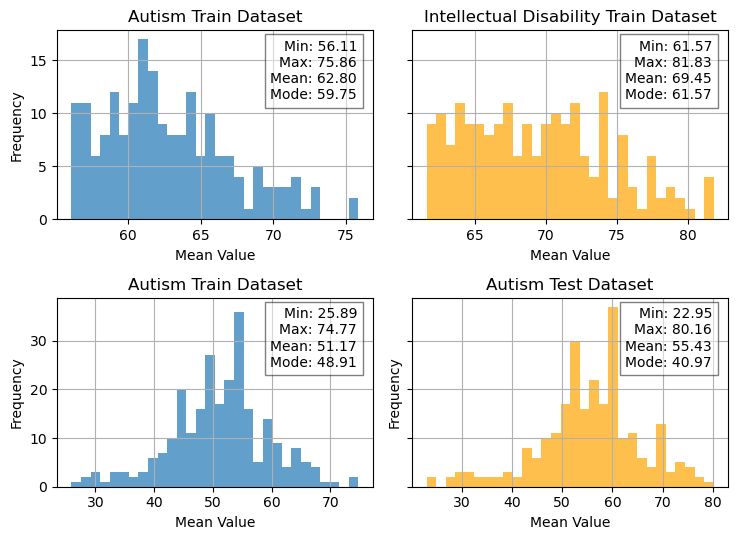

In [8]:
autism_stats = calculate_stats(train_autism)
intellectual_stats = calculate_stats(train_id)
autism_stats_test = calculate_stats(test_autism)
intellectual_stats_test = calculate_stats(test_id)

mean_per_row, _, _, _ = autism_stats
mean_per_row_, _, _, _ = intellectual_stats
mean_per_row_a_test, _, _, _ = autism_stats_test
mean_per_row_i_test, _, _, _ = intellectual_stats_test

autism_stats = stats_of_means(autism_stats)
intellectual_stats = stats_of_means(intellectual_stats)
autism_stats_test = stats_of_means(autism_stats_test)
intellectual_stats_test = stats_of_means(intellectual_stats_test)


# plotting the distributions for both clipped datasets with the statistics of means as text annotations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7.48, 5.5), sharey='row')


# Plotting Autism Train Dataset statistics after clipping
axes[0, 0].hist(mean_per_row, bins=30, alpha=0.7, label='Means Distribution')
#axes[0].axvline(autism_stats[2], color='red', linestyle='dashed', linewidth=2)
axes[0,0].set_title('Autism Train Dataset')
axes[0,0].set_xlabel('Mean Value')
axes[0,0].set_ylabel('Frequency')
# Adding text for min, max, mean, and mode of means
axes[0,0].text(0.95, 0.95, f'Min: {autism_stats[0]:.2f}\n' +
                          f'Max: {autism_stats[1]:.2f}\n' +
                          f'Mean: {autism_stats[2]:.2f}\n' +
                          f'Mode: {autism_stats[3]:.2f}',
             ha='right', va='top', transform=axes[0,0].transAxes, bbox=dict(facecolor='white', alpha=0.5))

axes[0,0].grid(True)



# Plotting Intellectual Train Dataset statistics after clipping
axes[0,1].hist(mean_per_row_, bins=30, alpha=0.7, label='Means Distribution', color='orange')
#axes[1].axvline(intellectual_stats[2], color='blue', linestyle='dashed', linewidth=2)
axes[0,1].set_title('Intellectual Disability Train Dataset')
axes[0,1].set_xlabel('Mean Value')
# Adding text for min, max, mean, and mode of means
axes[0,1].text(0.95, 0.95, f'Min: {intellectual_stats[0]:.2f}\n' +
                          f'Max: {intellectual_stats[1]:.2f}\n' +
                          f'Mean: {intellectual_stats[2]:.2f}\n' +
                          f'Mode: {intellectual_stats[3]:.2f}',
             ha='right', va='top', transform=axes[0,1].transAxes, bbox=dict(facecolor='white', alpha=0.5))

axes[0,1].grid(True)

# Plotting Autism Train Dataset statistics after clipping
axes[1, 0].hist(mean_per_row_a_test, bins=30, alpha=0.7, label='Means Distribution')
#axes[0].axvline(autism_stats[2], color='red', linestyle='dashed', linewidth=2)
axes[1,0].set_title('Autism Train Dataset')
axes[1,0].set_xlabel('Mean Value')
axes[1,0].set_ylabel('Frequency')
# Adding text for min, max, mean, and mode of means
axes[1,0].text(0.95, 0.95, f'Min: {autism_stats_test[0]:.2f}\n' +
                          f'Max: {autism_stats_test[1]:.2f}\n' +
                          f'Mean: {autism_stats_test[2]:.2f}\n' +
                          f'Mode: {autism_stats_test[3]:.2f}',
             ha='right', va='top', transform=axes[1,0].transAxes, bbox=dict(facecolor='white', alpha=0.5))

axes[1,0].grid(True)

# Plotting Autism Train Dataset statistics after clipping
axes[1, 1].hist(mean_per_row_i_test, bins=30, alpha=0.7, label='Means Distribution', color='orange')
#axes[0].axvline(autism_stats[2], color='red', linestyle='dashed', linewidth=2)
axes[1,1].set_title('Autism Test Dataset')
axes[1,1].set_xlabel('Mean Value')
axes[1,1].set_ylabel('Frequency')
# Adding text for min, max, mean, and mode of means
axes[1,1].text(0.95, 0.95, f'Min: {intellectual_stats_test[0]:.2f}\n' +
                          f'Max: {intellectual_stats_test[1]:.2f}\n' +
                          f'Mean: {intellectual_stats_test[2]:.2f}\n' +
                          f'Mode: {intellectual_stats_test[3]:.2f}',
             ha='right', va='top', transform=axes[1,1].transAxes, bbox=dict(facecolor='white', alpha=0.5))

axes[1,1].grid(True)


# Adjusting layout to prevent overlap
plt.tight_layout()
#plt.show()

In [9]:
def prepare_data_for_plotting(df):
    # Group by 'client_id' and 'target', then count the occurrences
    return df.groupby(['client_id', 'target']).size().unstack(fill_value=0)

# Prepare data from all four datasets
autism_test_plot_data = prepare_data_for_plotting(test_autism)
autism_train_plot_data = prepare_data_for_plotting(train_autism)
intellectual_test_plot_data = prepare_data_for_plotting(test_id)
intellectual_train_plot_data = prepare_data_for_plotting(train_id)

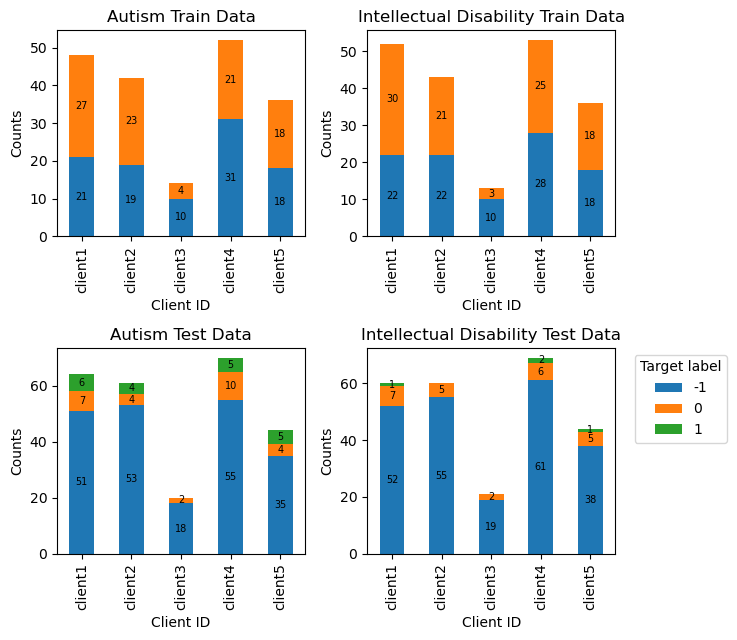

In [10]:
# Re-plot with integer counts in the bars, ensuring no decimal places are shown

# Create a 2x2 subplot layout with a specified width of 7.48 inches
fig, axs = plt.subplots(2, 2, figsize=(7.48, 6.5)) # Height is adjusted to maintain aspect ratio

# Define a function to add integer labels inside the bars
def add_int_labels(ax):
    for c in ax.containers:
        labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=7)

# Plot for Autism Train Data
autism_train_plot_data.plot(kind='bar', stacked=True, ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Autism Train Data')
axs[0, 0].set_xlabel('Client ID')
axs[0, 0].set_ylabel('Counts')
add_int_labels(axs[0, 0])

# Plot for Intellectual Train Data
intellectual_train_plot_data.plot(kind='bar', stacked=True, ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Intellectual Disability Train Data')
axs[0, 1].set_xlabel('Client ID')
axs[0, 1].set_ylabel('Counts')
add_int_labels(axs[0, 1])

# Plot for Autism Test Data
autism_test_plot_data.plot(kind='bar', stacked=True, ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Autism Test Data')
axs[1, 0].set_xlabel('Client ID')
axs[1, 0].set_ylabel('Counts')
add_int_labels(axs[1, 0])

# Plot for Intellectual Test Data
intellectual_test_plot_data.plot(kind='bar', stacked=True, ax=axs[1, 1], legend=True)
axs[1, 1].set_title('Intellectual Disability Test Data')
axs[1, 1].set_xlabel('Client ID')
axs[1, 1].set_ylabel('Counts')
add_int_labels(axs[1, 1])

# Place the legend on the last plot
axs[1, 1].legend(title='Target label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

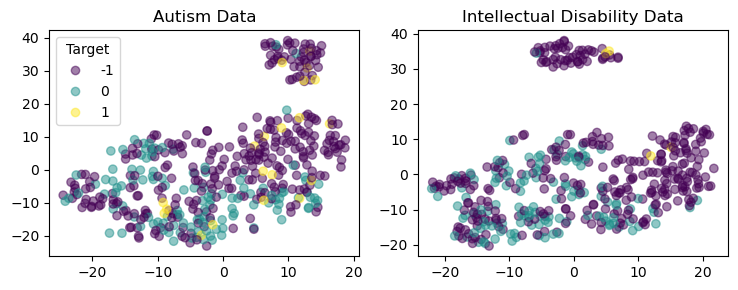

In [11]:
from sklearn.manifold import TSNE

# Concatenate train and test datasets separately for autism and intellectual disability
autism_combined_df = pd.concat([train_autism, test_autism])
intellectual_combined_df = pd.concat([train_id, test_id])

# Drop non-feature columns ('client_id', 'case_id', and 'target') from both combined datasets
autism_features = autism_combined_df.drop(['client_id', 'case_id', 'target'], axis=1)
intellectual_features = intellectual_combined_df.drop(['client_id', 'case_id', 'target'], axis=1)

# Fill missing values with the median for both datasets
autism_features = autism_features.fillna(autism_features.median())
intellectual_features = intellectual_features.fillna(intellectual_features.median())

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Compute t-SNE for autism dataset
autism_tsne = tsne.fit_transform(autism_features)
autism_combined_df['tsne-2d-one'] = autism_tsne[:, 0]
autism_combined_df['tsne-2d-two'] = autism_tsne[:, 1]

# Compute t-SNE for intellectual disability dataset
intellectual_tsne = tsne.fit_transform(intellectual_features)
intellectual_combined_df['tsne-2d-one'] = intellectual_tsne[:, 0]
intellectual_combined_df['tsne-2d-two'] = intellectual_tsne[:, 1]

# Create a figure with 2 columns and 1 row, with a total width of 7.48 inches
fig, ax = plt.subplots(1, 2, figsize=(7.48, 3))

# Autism dataset t-SNE plot
sc1 = ax[0].scatter(autism_combined_df['tsne-2d-one'], autism_combined_df['tsne-2d-two'],
                    c=autism_combined_df['target'], cmap='viridis', alpha=0.5)
ax[0].set_title('Autism Data')

# Intellectual disability dataset t-SNE plot
sc2 = ax[1].scatter(intellectual_combined_df['tsne-2d-one'], intellectual_combined_df['tsne-2d-two'],
                    c=intellectual_combined_df['target'], cmap='viridis', alpha=0.5)
ax[1].set_title('Intellectual Disability Data')

handles1, labels1 = sc1.legend_elements(prop="colors", alpha=0.5)

ax[0].legend(handles1, ['-1', '0', '1'], title="Target")

# For the intellectual disability plot
handles2, labels2 = sc2.legend_elements(prop="colors", alpha=0.5)
#ax[1].legend(handles2, ['-1','0', '1'], title="Target")


# Show the plot with tight layout
plt.tight_layout()
plt.show()

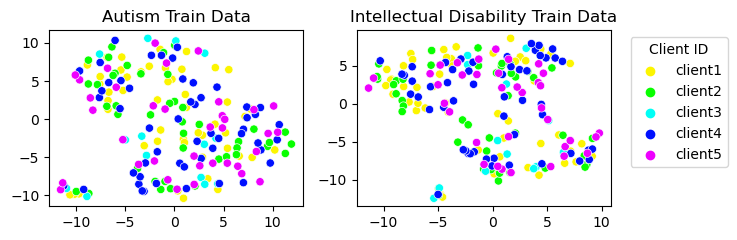

In [12]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler


# Re-define the function to plot t-SNE without showing the plot immediately, to allow for subplotting
def get_tsne_results(df):
    # Exclude 'case_id', 'client_id', and 'target' columns
    features = df.drop(['case_id', 'client_id', 'target'], axis=1)
    # Fit t-SNE with 2 components
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)
    return tsne_results, df['client_id']

# Get t-SNE results for both datasets
autism_train_tsne_results, autism_train_client_ids = get_tsne_results(train_autism)
intellectual_train_tsne_results, intellectual_train_client_ids = get_tsne_results(train_id)

# Create a figure with 2 subplots (1 row, 2 columns) and a specified width of 7.48 inches
fig, axs = plt.subplots(1, 2, figsize=(7.48, 2.5)) # Height adjusted to keep aspect ratio

# Plot for Autism Train Data
sns.scatterplot(
    x=autism_train_tsne_results[:, 0],
    y=autism_train_tsne_results[:, 1],
    hue=autism_train_client_ids,
    palette=sns.color_palette("hsv", len(autism_train_client_ids.unique())),
    legend=False,
    ax=axs[0]
)
axs[0].set_title('Autism Train Data')

# Plot for Intellectual Train Data
sns.scatterplot(
    x=intellectual_train_tsne_results[:, 0],
    y=intellectual_train_tsne_results[:, 1],
    hue=intellectual_train_client_ids,
    palette=sns.color_palette("hsv", len(intellectual_train_client_ids.unique())),
    legend='full',
    ax=axs[1]
)
axs[1].set_title('Intellectual Disability Train Data')
axs[1].legend(title='Client ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()

In [13]:
train_autism.rename({'Empathy (ASD)': 'Empathy',
                     'Verbal and Intellectual Ability (ASD)': 'VIA',
                    'Attention deficit (Intellectual-ASD-ADHD)': 'ADHD',
                    'Sustained Attention (ASD)': 'Sustained Attention'}, inplace=True, axis='columns')

In [14]:
train_id.rename({'Attention deficit (Intellectual-ASD-ADHD)': 'ADHD'}, inplace=True, axis='columns')

/tmp/ipykernel_13686/4156383265.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(client_data, ax=ax, label=client if i == 0 else None, fill=True)


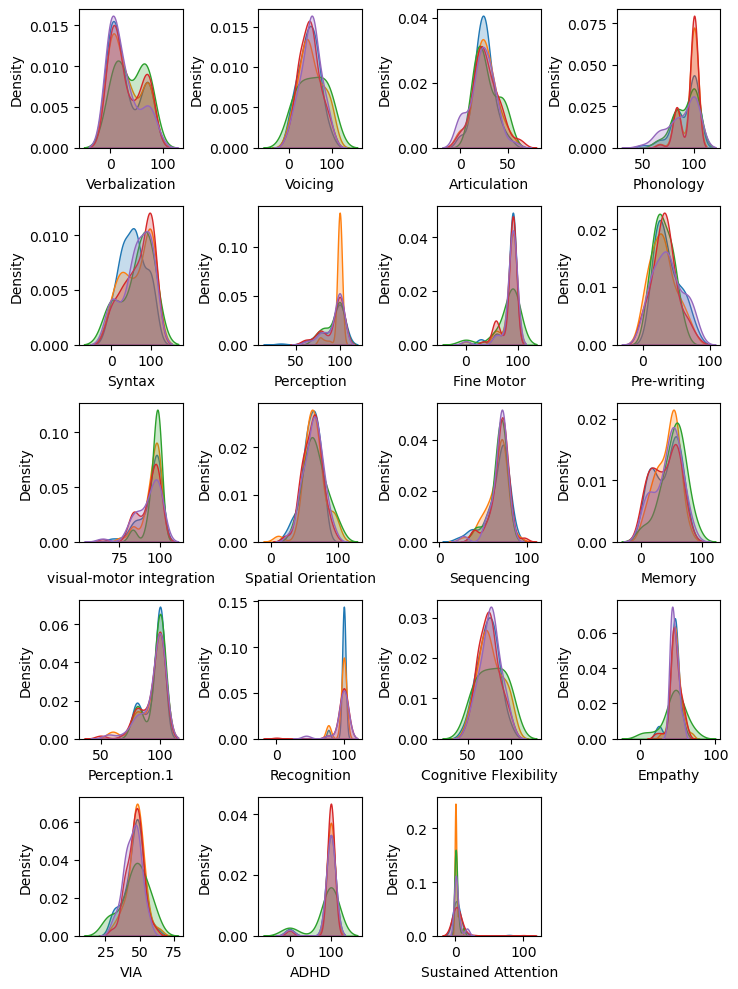

/tmp/ipykernel_13686/4156383265.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(client_data, ax=ax, label=client if i == 0 else None, fill=True)


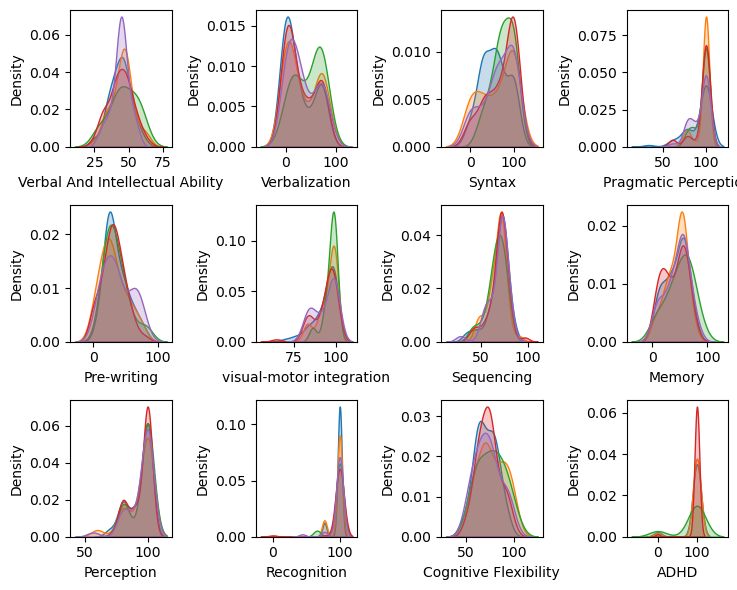

In [15]:
# Define the layout of the subplots for both datasets
autism_layout = (5, 4)  # 5 rows, 4 columns for autism
intellectual_layout = (3, 4)  # 3 rows, 4 columns for intellectual

# Define a function to plot the distributions with a specified layout and legend only on the first subplot
def plot_distributions_custom_layout(dataframes, exclude_columns, layouts):
    # Create a figure for each dataframe with the specified layout
    for dataframe_index, (df, layout) in enumerate(zip(dataframes, layouts)):
        n_rows, n_cols = layout
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(7.48, n_rows * 2), squeeze=False)
        fig.subplots_adjust(hspace=0.5, wspace=0.3)
        
        # Filter out the excluded columns and get only the first n_cols * n_rows columns
        cols_to_plot = [col for col in df.columns if col not in exclude_columns]
        cols_to_plot = cols_to_plot[:n_cols * n_rows]
        
        # Plot each column
        for i, col in enumerate(cols_to_plot):
            # Determine the position of the subplot
            row_idx, col_idx = divmod(i, n_cols)
            ax = axes[row_idx, col_idx]
            
            # Plot data for each client
            for client in sorted(df['client_id'].unique()):
                client_data = df[df['client_id'] == client][col]
                sns.kdeplot(client_data, ax=ax, label=client if i == 0 else None, fill=True)
            
            #ax.set_title(f'{col}')
            
        
        # Remove empty subplots
        for j in range(i+1, n_cols * n_rows):
            row_idx, col_idx = divmod(j, n_cols)
            fig.delaxes(axes[row_idx, col_idx])
        
        plt.tight_layout()
        plt.show()

# Plot the distributions with the custom layouts for autism and intellectual dataframes
exclude_columns = ['case_id', 'client_id', 'target']
plot_distributions_custom_layout(
    [train_autism, train_id], 
    exclude_columns, 
    [autism_layout, intellectual_layout]
)

In [16]:
from scipy.stats import kurtosis, skew, mode

# Function to perform the required computations
def compute_client_statistics(data):
    # Filter the columns that are not to be included in mean calculations
    excluded_columns = ['case_id', 'client_id', 'target']
    data_numeric = data.drop(columns=excluded_columns, errors='ignore')

    # Compute mean per row for each client
    data['mean_per_row'] = data_numeric.mean(axis=1)

    # Aggregate data per client
    client_stats = data.groupby('client_id').agg({
        'target': [lambda x: (x == 1).sum(), lambda x: (x == 0).sum(), lambda x: (x == -1).sum()],
        'mean_per_row': ['mean', 'min', 'max', 'median']
    })

    # Flatten the MultiIndex columns
    client_stats.columns = ['_'.join(col) for col in client_stats.columns]

    # Rename columns for clarity
    client_stats.rename(columns={
        'target_<lambda_0>': '#1',
        'target_<lambda_1>': '#0',
        'target_<lambda_2>': '#-1',
        'mean_per_row_mean': 'Mean',
        'mean_per_row_min': 'Min',
        'mean_per_row_max': 'Max',
        'mean_per_row_median': 'Median'
    }, inplace=True)

    # Calculate mode - note that mode could return multiple values, we take the first one
    client_stats['Mode'] = data_numeric.apply(lambda x: mode(x, nan_policy='omit').mode[0], axis=1).groupby(data['client_id']).mean()

    # Calculate kurtosis and skewness
    client_kurtosis_skewness = data_numeric.apply(lambda x: pd.Series([kurtosis(x, nan_policy='omit'), skew(x, nan_policy='omit')], index=['Kurtosis', 'Skewness']), axis=1)
    client_stats = client_stats.join(client_kurtosis_skewness.groupby(data['client_id']).mean())

    return client_stats

# Compute statistics for autism and intellectual datasets
autism_client_stats = compute_client_statistics(autism_combined_df)
intellectual_client_stats = compute_client_statistics(intellectual_combined_df)

# Displaying the results
display(autism_client_stats.head(), intellectual_client_stats.head())

/tmp/ipykernel_13686/2185303528.py:33: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  client_stats['Mode'] = data_numeric.apply(lambda x: mode(x, nan_policy='omit').mode[0], axis=1).groupby(data['client_id']).mean()
/tmp/ipykernel_13686/2185303528.py:33: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tru

,#1,#0,#-1,Mean,Min,Max,Median,Mode,Kurtosis,Skewness
client_id,,,,,,,,,,
client1,6,34,72,50.534887,26.802025,63.295471,51.835381,75.437500,-1.087440,-0.062931
client2,4,27,72,50.716742,27.572732,66.574720,52.125510,68.019417,-1.129979,-0.100601
client3,0,6,28,52.180539,36.830962,67.325870,52.867313,71.941176,-1.038477,-0.182843
client4,5,31,86,51.106956,25.436990,66.745495,51.664744,74.487705,-1.141254,-0.126319
client5,5,22,53,50.497837,29.251710,67.490366,51.647778,70.481250,-1.079359,-0.127049


,#1,#0,#-1,Mean,Min,Max,Median,Mode,Kurtosis,Skewness
client_id,,,,,,,,,,
client1,1,37,74,52.640897,26.064766,68.667816,53.818236,81.725663,-1.100188,-0.186493
client2,0,26,77,52.463124,22.495998,67.381790,53.818938,75.313739,-1.168891,-0.205035
client3,0,5,29,54.500196,34.404180,68.964794,53.541855,74.164155,-1.020274,-0.305908
client4,2,31,89,53.243140,28.098964,68.311522,54.205988,74.603465,-1.179477,-0.254468
client5,1,23,56,52.339712,24.010779,68.904327,54.370304,75.494300,-1.070093,-0.229743
